## What Kind of Bike Is It?

This model categorizes two Motorcycles: Indian Scout and Honda Shadow Aero.

In [2]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai fastdownload fastcore duckduckgo_search

In [2]:
from duckduckgo_search import ddg_images

def get_screenshot_urls(search_term, max_images=30):
    print(f"Searching for '{search_term}'")
    return L(ddg_images(search_term, max_results=max_images)).itemgot('image')

In [48]:
from time import sleep
from fastai.vision.utils import download_images
from fastcore.all import *

categories = ['indian scout bike', 'honda shadow aero bike']

top_level_path = Path('bikes')

if not top_level_path.exists():
    top_level_path.mkdir()
    for category in categories:
        dest_path = top_level_path/category
        dest_path.mkdir(exist_ok=True)
        urls = get_screenshot_urls(category, 500)
        download_images(dest=dest_path, urls=urls)
        sleep(10)

Searching for 'indian scout bike'
Searching for 'honda shadow aero bike'


In [49]:
from fastai.vision.all import *

failed = verify_images(get_image_files(top_level_path))
failed.map(Path.unlink)

(#7) [None,None,None,None,None,None,None]

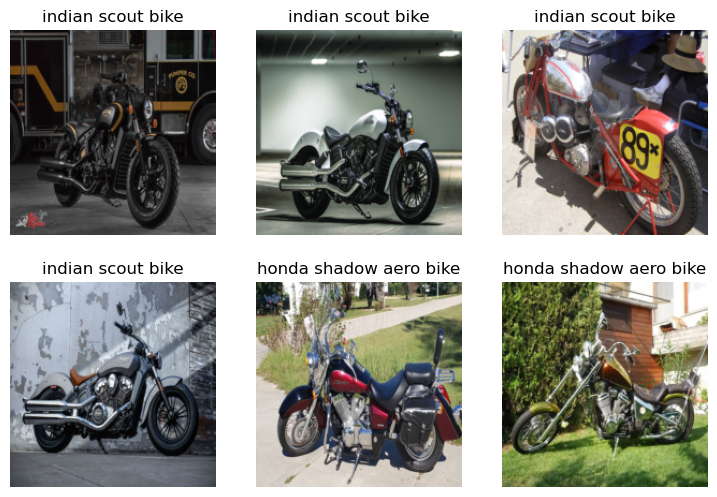

In [59]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=69),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(top_level_path, bs=100)

dls.show_batch(max_n=6)

In [60]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.300726,0.379224,0.132075,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.438037,0.259053,0.088050,00:08
1,0.281205,0.235535,0.075472,00:08
2,0.194003,0.219159,0.050314,00:08
3,0.144657,0.221308,0.050314,00:08
4,0.109944,0.230451,0.050314,00:10
5,0.087700,0.232563,0.062893,00:08
6,0.071929,0.228495,0.069182,00:08
7,0.059222,0.223254,0.056604,00:08
8,0.049423,0.224018,0.056604,00:09
9,0.041704,0.222372,0.056604,00:10


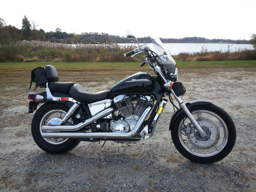

In [62]:
from fastdownload import download_url

test_path = top_level_path/'test.jpg'

# Note: max_results is high b/c we don't want to test our model with a training image
image_url = ddg_images('honda shadow aero bike for sale 2022', max_results=200)[92]['image']
download_url(image_url, test_path)
Image.open(test_path).to_thumb(256,256)

In [63]:
bike_type,_,probability = learn.predict(PILImage.create(test_path))
print(bike_type)
print(f"{probability[0]:.4f}")

honda shadow aero bike
TensorBase([9.9999e-01, 6.4775e-06])
1.0000


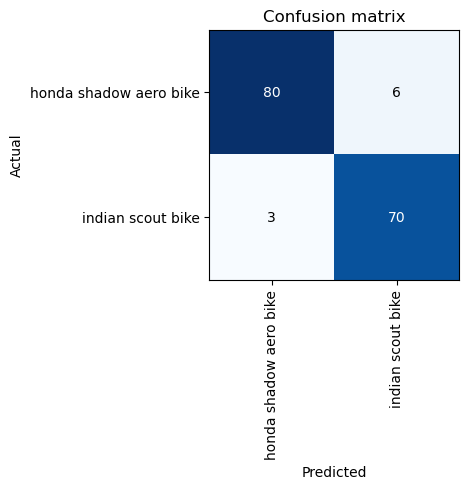

In [64]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

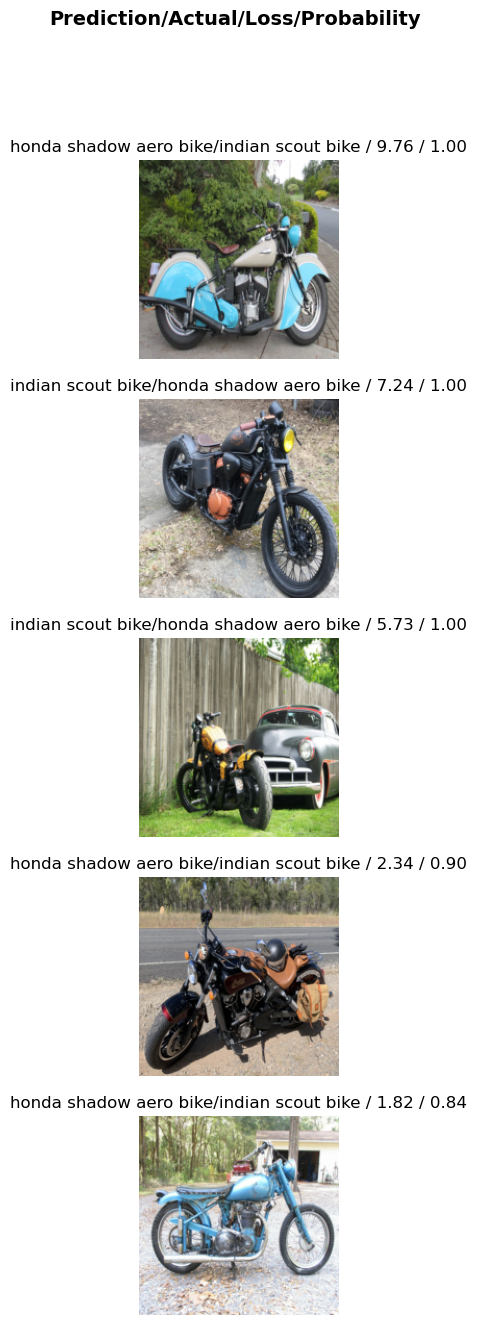

In [65]:
interp.plot_top_losses(5, nrows=5)

In [56]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner

In [58]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()